In [9]:
from __future__ import division
import os
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from catalyst.api import record, symbols, order_target_percent
from catalyst.utils.run_algo import run_algorithm

In [76]:
import ccxt
exchange = ccxt.binance()
exchange.load_markets()
exchange.verbose = True



'''list_currencies = ['ETH/BTC', 'AST/ETH', 'ZRX/ETH', 'REP/ETH',
                   'ENJ/ETH', 'BAT/ETH', 'BLZ/ETH', 'BNT/ETH', 'POE/ETH', 
                   'POWR/ETH', 'TUSD/ETH', 'SNT/ETH', 'REQ/ETH', 'CVC/ETH',
                   'ENG/ETH', 'ELF/ETH', 'MANA/ETH', 'LINK/ETH', 'KNC/ETH']'''
exchange.markets.keys()

dict_keys(['ETH/BTC', 'LTC/BTC', 'BNB/BTC', 'NEO/BTC', 'QTUM/ETH', 'EOS/ETH', 'SNT/ETH', 'BNT/ETH', 'BCH/BTC', 'GAS/BTC', 'BNB/ETH', 'BTC/USDT', 'ETH/USDT', 'HSR/BTC', 'OAX/ETH', 'DNT/ETH', 'MCO/ETH', 'ICN/ETH', 'MCO/BTC', 'WTC/BTC', 'WTC/ETH', 'LRC/BTC', 'LRC/ETH', 'QTUM/BTC', 'YOYOW/BTC', 'OMG/BTC', 'OMG/ETH', 'ZRX/BTC', 'ZRX/ETH', 'STRAT/BTC', 'STRAT/ETH', 'SNGLS/BTC', 'SNGLS/ETH', 'BQX/BTC', 'BQX/ETH', 'KNC/BTC', 'KNC/ETH', 'FUN/BTC', 'FUN/ETH', 'SNM/BTC', 'SNM/ETH', 'NEO/ETH', 'IOTA/BTC', 'IOTA/ETH', 'LINK/BTC', 'LINK/ETH', 'XVG/BTC', 'XVG/ETH', 'SALT/BTC', 'SALT/ETH', 'MDA/BTC', 'MDA/ETH', 'MTL/BTC', 'MTL/ETH', 'SUB/BTC', 'SUB/ETH', 'EOS/BTC', 'SNT/BTC', 'ETC/ETH', 'ETC/BTC', 'MTH/BTC', 'MTH/ETH', 'ENG/BTC', 'ENG/ETH', 'DNT/BTC', 'ZEC/BTC', 'ZEC/ETH', 'BNT/BTC', 'AST/BTC', 'AST/ETH', 'DASH/BTC', 'DASH/ETH', 'OAX/BTC', 'ICN/BTC', 'BTG/BTC', 'BTG/ETH', 'EVX/BTC', 'EVX/ETH', 'REQ/BTC', 'REQ/ETH', 'VIB/BTC', 'VIB/ETH', 'HSR/ETH', 'TRX/BTC', 'TRX/ETH', 'POWR/BTC', 'POWR/ETH', 'ARK/BTC

In [49]:
import pandas as pd
from ccxt_market_data import get_market_data, create_ETH_BTC, create_ETH_ETH
data_path = './data/'

list_currencies = ['ETH/BTC', 'KNC/ETH', 'ELF/ETH', 'BAT/ETH', 'MANA/ETH', 'ZRX/ETH', 'BNT/ETH', 'LINK/ETH',
                   'SNT/ETH', 'REP/ETH', 'RCN/ETH', 'ENJ/ETH', 'RDN/ETH', 'LEND/ETH', 'LRC/ETH', 'RLC/ETH',
                   'REQ/ETH', 'POWR/ETH'
                  ]


for symbol in list_currencies:
    get_market_data(symbol=symbol, 
                    exchange_='binance', 
                    timeframe='1d', 
                    save=True, 
                    data_path=data_path)
    
create_ETH_BTC(data_path)
create_ETH_ETH(data_path)

In [87]:
get_market_data(symbol='SNX/USDT', 
                    exchange_='binance', 
                    timeframe='1d', 
                    save=True, 
                    data_path='./data/')

,Open,High,Low,Close,Volume
Timestamp,,,,,
2020-07-09,2.893,3.398,2.710,2.956,814828.589
2020-07-10,2.956,2.974,2.763,2.805,285202.522


In [118]:
from pycoingecko import CoinGeckoAPI
import datetime
import pandas as pd

def get_market_data_coingecko(symbol, _id):
    cg = CoinGeckoAPI()

    data = cg.get_coin_market_chart_by_id(_id, 'eth', 500)

    dates = [datetime.datetime.fromtimestamp(data['prices'][i][0] / 1000).strftime('%Y-%m-%d') for i in range(len(data['prices']))]
    price  = [data['prices'][i][1] for i in range(len(data['prices']))]

    df_data = {'Open': price, 'Timestamp' : dates} 
    df = pd.DataFrame(df_data)
    cols = ['Timestamp', 'Open']
    df = df[cols]
    
    df.drop(df.tail(1).index,inplace=True)

    df.to_csv(data_path + 'coingecko-{}-1d.csv'.format(symbol), index=False)
    
    {'POLY_ETH', 'polymath-network'}

In [156]:
list_currencies = [['POLY_ETH', 'polymath-network'],
                   ['BAND_ETH', 'band-protocol'],
                   ['MATIC_ETH', 'matic-network'],
                   ['REQ_ETH', 'request-network'],
                   ['RDN_ETH', 'raiden-network'],
                   ['RCN_ETH', 'ripio-credit-network'],
                   ['MKR_ETH', 'maker'],
                   ['ANT_ETH', 'aragon'],
                   ['PNK_ETH', 'kleros'],
                   ['GNO_ETH', 'gnosis'],
                   ['GEN_ETH', 'daostack'],
                   ['MLN_ETH', 'melon'],
                   ['UBT_ETH', 'unibright'],
                   ['NMR_ETH', 'numeraire'],
                   ['LPT_ETH', 'livepeer'],
                   ['XBASE_ETH', 'eterbase'],
                   ['COT_ETH', 'cotrader'],
                   ['AMN_ETH', 'amon'],
                   ['KIN_ETH', 'kin'],
                   ['MET_ETH', 'metal'],
                   ['BLT_ETH', 'bloom'],
                  ]

for currency in list_currencies:
    get_market_data_coingecko(currency[0], currency[1])

In [157]:
list_pairs_optim_binance = ['ETH_ETH', 'BTC_ETH', 'KNC_ETH', 'ELF_ETH',
                            'BAT_ETH', 'MANA_ETH', 'ZRX_ETH', 'BNT_ETH',  
                            'LINK_ETH', 'SNT_ETH', 'REP_ETH', 'ENJ_ETH',
                            'LEND_ETH', 'LRC_ETH', 'RLC_ETH', 'POWR_ETH']

list_pairs_optim_coingecko = ['POLY_ETH', 'REQ_ETH',
                              'RDN_ETH', 'RCN_ETH', 'MKR_ETH', 'ANT_ETH', 
                              'PNK_ETH', 'GNO_ETH', 'GEN_ETH', 'MLN_ETH',
                              'UBT_ETH', 'NMR_ETH', 'LPT_ETH', 'XBASE_ETH',
                              'COT_ETH', 'AMN_ETH', 'KIN_ETH', 'MET_ETH',
                              'BLT_ETH'  
                              #'BAND_ETH', 'MATIC_ETH'
                             ]

#'RCN_ETH', 'RDN_ETH', 'REQ_ETH', 

exchange_ = 'binance'
timeframe = '1d'

def create_portfolio(df, list_pairs: list, exchange: str, timeframe: str):
    '''
    This function is aimed to gather all pairs in a single dataframe. this is our portfolio
    '''
    for pair in list_pairs:
        filename = '{}-{}-{}.csv'.format(exchange, pair,timeframe)
        pair_data = pd.read_csv(data_path + filename)
        pair_data = pair_data.set_index('Timestamp')
        pair_data = pd.DataFrame(pair_data['Open']) 
        pair_data.columns = [pair]

        df = pd.concat([df, pair_data], axis=1)

    return df

df = pd.DataFrame()
df = create_portfolio(df, list_pairs=list_pairs_optim_binance,
                exchange=exchange_,
                timeframe=timeframe,
                )

df = create_portfolio(df, list_pairs=list_pairs_optim_coingecko,
                exchange='coingecko',
                timeframe=timeframe,
                )

df

#df[-29:].fillna(method = 'ffill')

,ETH_ETH,BTC_ETH,KNC_ETH,ELF_ETH,BAT_ETH,MANA_ETH,ZRX_ETH,BNT_ETH,LINK_ETH,SNT_ETH,...,MLN_ETH,UBT_ETH,NMR_ETH,LPT_ETH,XBASE_ETH,COT_ETH,AMN_ETH,KIN_ETH,MET_ETH,BLT_ETH
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-27,1.0,27.955606,0.001180,0.001226,0.001189,0.000355,0.001790,0.003811,0.003177,0.000149,...,0.107580,0.000289,0.027273,0.042617,0.000007,2.029726e-07,0.000004,1.810978e-07,0.002482,0.000203
2019-02-28,1.0,28.271748,0.001154,0.001172,0.001164,0.000312,0.001922,0.003817,0.003175,0.000150,...,0.108456,0.000250,0.031191,0.041650,0.000005,2.023171e-07,0.000004,1.813768e-07,0.002396,0.000205
2019-03-01,1.0,28.184893,0.001148,0.001126,0.001196,0.000318,0.001834,0.003831,0.003130,0.000148,...,0.107848,0.000266,0.031558,0.048528,0.000005,2.010455e-07,0.000004,1.811608e-07,0.002394,0.000204
2019-03-02,1.0,28.262959,0.001498,0.001187,0.001208,0.000311,0.001829,0.003862,0.003173,0.000149,...,0.114805,0.000247,0.032733,0.045796,0.000006,2.023061e-07,0.000004,1.874813e-07,0.002376,0.000200
2019-03-03,1.0,28.821766,0.001381,0.001157,0.001352,0.000315,0.001828,0.003903,0.003185,0.000150,...,0.115602,0.000231,0.034094,0.055741,0.000011,1.050525e-07,0.000004,1.766802e-07,0.002266,0.000205
2019-03-04,1.0,29.160470,0.001320,0.001126,0.001298,0.000309,0.001839,0.003923,0.003210,0.000154,...,0.113010,0.000221,0.036147,0.055702,0.000008,1.513659e-07,0.000004,1.570430e-07,0.002247,0.000231
2019-03-05,1.0,29.572675,0.001279,0.001088,0.001334,0.000316,0.001801,0.003915,0.003208,0.000152,...,0.099784,0.000220,0.035689,0.055452,0.000009,1.695291e-07,0.000005,1.805356e-07,0.002387,0.000272
2019-03-06,1.0,28.215908,0.001249,0.001073,0.001285,0.000314,0.001735,0.003813,0.003133,0.000146,...,0.103521,0.000216,0.033279,0.051771,0.000008,2.691275e-07,0.000004,1.703879e-07,0.002342,0.000269
2019-03-07,1.0,28.108837,0.001230,0.001096,0.001260,0.000300,0.001781,0.003838,0.003122,0.000144,...,0.105352,0.000203,0.035367,0.047677,0.000005,4.123780e-07,0.000004,1.672670e-07,0.002305,0.000254


,ETH_ETH,BTC_ETH,KNC_ETH,ELF_ETH,BAT_ETH,MANA_ETH,ZRX_ETH,BNT_ETH,LINK_ETH,SNT_ETH,...,MLN_ETH,UBT_ETH,NMR_ETH,LPT_ETH,XBASE_ETH,COT_ETH,AMN_ETH,KIN_ETH,MET_ETH,BLT_ETH
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-27,1.0,27.955606,0.001180,0.001226,0.001189,0.000355,0.001790,0.003811,0.003177,0.000149,...,0.107580,0.000289,0.027273,0.042617,0.000007,2.029726e-07,0.000004,1.810978e-07,0.002482,0.000203
2019-02-28,1.0,28.271748,0.001154,0.001172,0.001164,0.000312,0.001922,0.003817,0.003175,0.000150,...,0.108456,0.000250,0.031191,0.041650,0.000005,2.023171e-07,0.000004,1.813768e-07,0.002396,0.000205
2019-03-01,1.0,28.184893,0.001148,0.001126,0.001196,0.000318,0.001834,0.003831,0.003130,0.000148,...,0.107848,0.000266,0.031558,0.048528,0.000005,2.010455e-07,0.000004,1.811608e-07,0.002394,0.000204
2019-03-02,1.0,28.262959,0.001498,0.001187,0.001208,0.000311,0.001829,0.003862,0.003173,0.000149,...,0.114805,0.000247,0.032733,0.045796,0.000006,2.023061e-07,0.000004,1.874813e-07,0.002376,0.000200
2019-03-03,1.0,28.821766,0.001381,0.001157,0.001352,0.000315,0.001828,0.003903,0.003185,0.000150,...,0.115602,0.000231,0.034094,0.055741,0.000011,1.050525e-07,0.000004,1.766802e-07,0.002266,0.000205
2019-03-04,1.0,29.160470,0.001320,0.001126,0.001298,0.000309,0.001839,0.003923,0.003210,0.000154,...,0.113010,0.000221,0.036147,0.055702,0.000008,1.513659e-07,0.000004,1.570430e-07,0.002247,0.000231
2019-03-05,1.0,29.572675,0.001279,0.001088,0.001334,0.000316,0.001801,0.003915,0.003208,0.000152,...,0.099784,0.000220,0.035689,0.055452,0.000009,1.695291e-07,0.000005,1.805356e-07,0.002387,0.000272
2019-03-06,1.0,28.215908,0.001249,0.001073,0.001285,0.000314,0.001735,0.003813,0.003133,0.000146,...,0.103521,0.000216,0.033279,0.051771,0.000008,2.691275e-07,0.000004,1.703879e-07,0.002342,0.000269
2019-03-07,1.0,28.108837,0.001230,0.001096,0.001260,0.000300,0.001781,0.003838,0.003122,0.000144,...,0.105352,0.000203,0.035367,0.047677,0.000005,4.123780e-07,0.000004,1.672670e-07,0.002305,0.000254


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


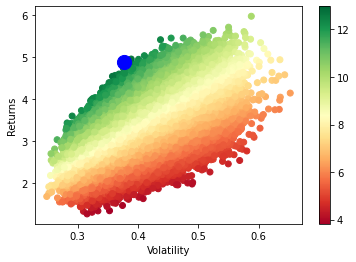

,63768
r,4.889314
stdev,0.376911
sharpe,12.972063
ETH_ETH,0.004328
BTC_ETH,0.015661
KNC_ETH,0.020122
ELF_ETH,0.034865
BAT_ETH,0.043439
MANA_ETH,0.044323
ZRX_ETH,0.004133


In [159]:
# Test Markowitz Optimization

# Set the time window that will be used to compute expected return and asset correlations
window = 28
# Set the number of days between each portfolio rebalancing
rebalance_period = 7
i = 0
nassets = len(list_pairs_optim_binance) + len(list_pairs_optim_coingecko)
df_balance = df


# Only rebalance at the beginning of the algorithm execution and
# every multiple of the rebalance period
if i == 0 or i % rebalance_period == 0:
    n = window
    prices = df_balance.fillna(method='ffill')
    display(prices)
    pr = np.asmatrix(prices.values)
    t_prices = prices.iloc[1:n + 1]
    t_val = t_prices.values
    tminus_prices = prices.iloc[0:n]
    tminus_val = tminus_prices.values
    # Compute daily returns (r)
    r = np.asmatrix(t_val / tminus_val - 1)
    # Compute the expected returns of each asset with the average
    # daily return for the selected time window
    m = np.asmatrix(np.mean(r, axis=0))
    # ###
    stds = np.std(r, axis=0)
    # Compute excess returns matrix (xr)
    xr = r - m
    # Matrix algebra to get variance-covariance matrix
    cov_m = np.dot(np.transpose(xr), xr) / n
    # Compute asset correlation matrix (informative only)
    corr_m = cov_m / np.dot(np.transpose(stds), stds)

    # Define portfolio optimization parameters
    n_portfolios = 100000
    results_array = np.zeros((3 + nassets, n_portfolios))
    for p in range(n_portfolios):
        weights = np.random.random(nassets)
        weights /= np.sum(weights)
        w = np.asmatrix(weights)
        p_r = np.sum(np.dot(w, np.transpose(m))) * 365
        p_std = np.sqrt(np.dot(np.dot(w, cov_m),
                               np.transpose(w))) * np.sqrt(365)

        # store results in results array
        results_array[0, p] = p_r
        results_array[1, p] = p_std
        # store Sharpe Ratio (return / volatility) - risk free rate element
        # excluded for simplicity
        results_array[2, p] = results_array[0, p] / results_array[1, p]

        for i, w in enumerate(weights):
            results_array[3 + i, p] = w

    columns = ['r', 'stdev', 'sharpe'] + list_pairs_optim_binance + list_pairs_optim_coingecko
    
    # convert results array to Pandas DataFrame
    results_frame = pd.DataFrame(np.transpose(results_array),
                                 columns=columns)
    
    # locate position of portfolio with highest Sharpe Ratio
    max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
    # locate positon of portfolio with minimum standard deviation
    # min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]


    # create scatter plot coloured by Sharpe Ratio
    plt.scatter(results_frame.stdev,
                results_frame.r,
                c=results_frame.sharpe,
                cmap='RdYlGn')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar()

    # plot blue circle to highlight position of portfolio
    # with highest Sharpe Ratio
    plt.scatter(max_sharpe_port[1],
                max_sharpe_port[0],
                marker='o',
                color='b',
                s=200)

    plt.show()
    display(pd.DataFrame(max_sharpe_port))

i += 1



In [21]:
trading_pair_out = 'ETH_ETH'
exchange_ = 'binance'
timeframe = '1d'
filename = '{}-{}-{}.csv'.format(exchange_, trading_pair_out,timeframe)
pd.read_csv(data_path + filename)

,Timestamp,Open,High,Low,Close,Volume
0,2018-12-27,1.0,1.0,1.0,1.0,7.521779e+05
1,2018-12-28,1.0,1.0,1.0,1.0,8.944542e+05
2,2018-12-29,1.0,1.0,1.0,1.0,1.006654e+06
3,2018-12-30,1.0,1.0,1.0,1.0,7.042594e+05
4,2018-12-31,1.0,1.0,1.0,1.0,4.846048e+05
5,2019-01-01,1.0,1.0,1.0,1.0,4.017769e+05
6,2019-01-02,1.0,1.0,1.0,1.0,9.414863e+05
7,2019-01-03,1.0,1.0,1.0,1.0,7.080913e+05
8,2019-01-04,1.0,1.0,1.0,1.0,8.052489e+05
9,2019-01-05,1.0,1.0,1.0,1.0,7.731691e+05


In [160]:
report = pd.DataFrame(max_sharpe_port)[3:]
report = round(100*report,2)
report

,63768
ETH_ETH,0.43
BTC_ETH,1.57
KNC_ETH,2.01
ELF_ETH,3.49
BAT_ETH,4.34
MANA_ETH,4.43
ZRX_ETH,0.41
BNT_ETH,1.44
LINK_ETH,2.12
SNT_ETH,1.84
